In [184]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf

In [185]:
races = pd.read_csv("2024 Races.csv")
results = pd.read_csv("2024 Results.csv") 


In [186]:
df_2 = pd.read_csv("UM_Races copy.csv", low_memory = False) 
df_2.drop(columns = ["Athlete age category", "Athlete ID", "Athlete club"], inplace = True)
df_2["Athlete average speed"] = pd.to_numeric(df_2["Athlete average speed"], errors = "coerce")
df_2 = df_2[df_2["Athlete average speed"] < 44]
df_2 = df_2[df_2["Athlete average speed"] > 1]
df_2

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,CHI,1978.0,M,10.286
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,CHI,1981.0,M,9.501
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,CHI,1987.0,M,9.472
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,ARG,1976.0,M,8.976
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,CHI,1992.0,M,8.469
...,...,...,...,...,...,...,...,...,...,...
6824323,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:22:54 h,AUS,1972.0,F,4.920
6824324,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:26:25 h,AUS,1970.0,M,4.895
6824325,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:26:26 h,AUS,1972.0,F,4.895
6824326,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:27:25 h,AUS,1975.0,F,4.888


In [187]:
##--- Running some checks---
# df_2["Event distance/length"].astype(str).str.contains("42km").value_counts()
mask = df_2["Event distance/length"].astype(str).str.contains("50km")
filtered = (df_2["Event distance/length"] == "42km").sum()
filtered
mask1 = pd.to_numeric(df_2["Athlete average speed"], errors = 'coerce').isna()
df_2.loc[mask1, "Athlete average speed"] = pd.to_timedelta(df_2.loc[mask1, "Athlete average speed"]).dt.total_seconds()/3600
df_2["Athlete average speed"] = df_2["Athlete average speed"].astype(float)
df_2



,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,CHI,1978.0,M,10.286
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,CHI,1981.0,M,9.501
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,CHI,1987.0,M,9.472
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,ARG,1976.0,M,8.976
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,CHI,1992.0,M,8.469
...,...,...,...,...,...,...,...,...,...,...
6824323,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:22:54 h,AUS,1972.0,F,4.920
6824324,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:26:25 h,AUS,1970.0,M,4.895
6824325,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:26:26 h,AUS,1972.0,F,4.895
6824326,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:27:25 h,AUS,1975.0,F,4.888


### Finding Age & Creating Age Groups
#### array(['25-29', '30-34', '35-39', '40-44', '20-24', '45-49', '50-54', 'Under 20', '55-59', '60-64', '65-69', '70-74', '75-79','80 and Over']

In [188]:

df_2["Athlete age"] = (df_2["Year of event"] - df_2["Athlete year of birth"]).fillna(0).astype(int)
df_2

df_2["Age Group"] = df_2["Athlete age"].apply(lambda x : "25-29" if x >=25 and x <=29 else "30-34" if x >=30 and x <=34 else "35-39" if x>=35 and x<=39
                                              else "40-44" if x >=40 and x <= 44 else "20-24" if x >=20 and x<= 24 else "45-49" if x >=40 and x<=49
                                              else "50-54" if x>=50 and x<=54 else "Under 20" if x>0 and x<=20 else "55-59" if x>=55 and x<=59
                                              else "60-64" if x>=60 and x<=64 else "65-69" if x>=65 and x<=69 else "70-74" if x>=70 and x<=74
                                              else "75-79" if x>=75 and x<=79 else "80 and Over" if x>=80 else "Not available") 
df_2


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete country,Athlete year of birth,Athlete gender,Athlete average speed,Athlete age,Age Group
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,CHI,1978.0,M,10.286,40,40-44
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,CHI,1981.0,M,9.501,37,35-39
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,CHI,1987.0,M,9.472,31,30-34
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,ARG,1976.0,M,8.976,42,40-44
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,CHI,1992.0,M,8.469,26,25-29
...,...,...,...,...,...,...,...,...,...,...,...,...
6824323,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:22:54 h,AUS,1972.0,F,4.920,43,40-44
6824324,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:26:25 h,AUS,1970.0,M,4.895,45,45-49
6824325,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:26:26 h,AUS,1972.0,F,4.895,43,40-44
6824326,2015,08.10.2015,Yurrebilla Trail 56km Ultra (AUS),56km,401,11:27:25 h,AUS,1975.0,F,4.888,40,40-44


In [189]:
#mask2 = pd.to_timedelta(df_2["Athlete performance"], errors = "coerce").isna()
#df_2.loc[mask2, "Athlete performance"] = pd.to_numeric(df_2.loc[mask2, "Athelte performance"].str.replace(r"[^\d.]", "", regex = True))
#df_2.loc[mask2, "Athlete performance"] = df_2.loc[mask2, "Athlete performance"] 

# for later - because the column Athlete performance has values in time and hour format because of the type of races
# do some visualizations first on this data and then convert all non time values to nan for futher analysis. 

## Cleaning Data

In [190]:
results = results.drop_duplicates()
races = races.drop_duplicates()
races

,Race,Year,Date,Finishers
0,Houston Marathon,2024,2024-01-14,7180
1,Atlanta Marathon,2024,2024-02-24,1582
2,Disney World Marathon,2024,2024-01-03,12710
3,Carmel Marathon,2024,2024-04-13,1451
4,Jack and Jill Downhill Marathon,2024,2024-07-27,701
...,...,...,...,...
260,Seattle Marathon,2024,2024-12-01,2017
261,Ghost of Seattle Marathon,2024,2024-11-30,34
262,North Central Trail Marathon,2024,2024-11-30,274
263,Mobile Marathon,2024,2024-01-14,60


In [191]:
results["Age Group"].unique()

array(['25-29', '30-34', '35-39', '40-44', '20-24', '45-49', '50-54',
       'Under 20', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80 and Over'], dtype=object)

# Merging Race and Results df's


In [192]:
results = pd.merge(results, races, on = ["Race"])
results

,Name,Race,Year_x,Gender,Finish,Age Group,Year_y,Date,Finishers
0,Zouhair Talbi,Houston Marathon,2024,Men,7599,25-29,2024,2024-01-14,7180
1,Tsedat Ayana,Houston Marathon,2024,Men,7620,25-29,2024,2024-01-14,7180
2,Hendrik Pfeiffer,Houston Marathon,2024,Men,7634,30-34,2024,2024-01-14,7180
3,Pat Tiernan,Houston Marathon,2024,Men,7665,25-29,2024,2024-01-14,7180
4,Hugo Edgardo Catrileo Tapia,Houston Marathon,2024,Men,7724,25-29,2024,2024-01-14,7180
...,...,...,...,...,...,...,...,...,...
489600,Mari Salcido,Miami Marathon,2024,Women,18521,50-54,2024,2024-01-28,2677
489601,Vasilios Stayeas,Miami Marathon,2024,Men,21076,75-79,2024,2024-01-28,2677
489602,Michael Weiss,Miami Marathon,2024,Men,21096,30-34,2024,2024-01-28,2677
489603,Mark Larsen,Miami Marathon,2024,Men,22582,30-34,2024,2024-01-28,2677


### Adding the distance parameter to the results df

In [193]:
exceptions =['Alamo 13.1 fight to The Finish','Maine Coast Half Marathon & 5K','Demi Marathon Group Investors De Granby']

# modifying the actual results df instead of creating a copy using .loc[:, "column name"]

results.loc[:,"Event distance/length"] = np.where(~ results["Race"].isin(exceptions), 42, np.nan) 
results = results[results["Event distance/length"].notna()]
results.shape

# add for 50 km 

results.loc[:, "Event distance/length"] = np.where(results["Race"].isin(["Super Marathon"]), 50, 42)
results.columns 
# 'Name', 'Race', 'Year_x', 'Gender', 'Finish', 'Age Group', 'Event distance/length', 'Year_y', 'Date', 'Finishers']
      
results.head()
# drop - Name , Year_x
# drop in df_2 - Athlete age category, athelete id , FOR ATH AVG SPEED - use nan for the other df 

,Name,Race,Year_x,Gender,Finish,Age Group,Year_y,Date,Finishers,Event distance/length
0,Zouhair Talbi,Houston Marathon,2024,Men,7599,25-29,2024,2024-01-14,7180,42.0
1,Tsedat Ayana,Houston Marathon,2024,Men,7620,25-29,2024,2024-01-14,7180,42.0
2,Hendrik Pfeiffer,Houston Marathon,2024,Men,7634,30-34,2024,2024-01-14,7180,42.0
3,Pat Tiernan,Houston Marathon,2024,Men,7665,25-29,2024,2024-01-14,7180,42.0
4,Hugo Edgardo Catrileo Tapia,Houston Marathon,2024,Men,7724,25-29,2024,2024-01-14,7180,42.0


## Converting s to hours and finding the speed of the athlete

In [194]:
results.loc[:,"Finish"] = results["Finish"]/3600
results.loc[:,"Finish"] = results["Finish"].round(3)
results.loc[:,"Finish"] = results["Finish"].astype(float)
results

/var/folders/wk/dq2pz2ts0kbfwcvtv17zzmmh0000gn/T/ipykernel_27995/2168862269.py:1: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2.11083333 2.11666667 2.12055556 ... 5.86       6.27277778 6.27305556]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



,Name,Race,Year_x,Gender,Finish,Age Group,Year_y,Date,Finishers,Event distance/length
0,Zouhair Talbi,Houston Marathon,2024,Men,2.111,25-29,2024,2024-01-14,7180,42.0
1,Tsedat Ayana,Houston Marathon,2024,Men,2.117,25-29,2024,2024-01-14,7180,42.0
2,Hendrik Pfeiffer,Houston Marathon,2024,Men,2.121,30-34,2024,2024-01-14,7180,42.0
3,Pat Tiernan,Houston Marathon,2024,Men,2.129,25-29,2024,2024-01-14,7180,42.0
4,Hugo Edgardo Catrileo Tapia,Houston Marathon,2024,Men,2.146,25-29,2024,2024-01-14,7180,42.0
...,...,...,...,...,...,...,...,...,...,...
489600,Mari Salcido,Miami Marathon,2024,Women,5.145,50-54,2024,2024-01-28,2677,42.0
489601,Vasilios Stayeas,Miami Marathon,2024,Men,5.854,75-79,2024,2024-01-28,2677,42.0
489602,Michael Weiss,Miami Marathon,2024,Men,5.860,30-34,2024,2024-01-28,2677,42.0
489603,Mark Larsen,Miami Marathon,2024,Men,6.273,30-34,2024,2024-01-28,2677,42.0


### Calculating Athlete Speed


In [195]:
results.loc[:,"Athlete Speed"] = results["Event distance/length"]/results["Finish"]
results.loc[:,"Athlete Speed"] = results.loc[:,"Athlete Speed"].round(2)
results["Athlete Speed"].max()

/var/folders/wk/dq2pz2ts0kbfwcvtv17zzmmh0000gn/T/ipykernel_27995/288643681.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



22.21

In [196]:
ageLabels = ['Under 20', '20-24', '25-29', '30-34', '35-39', 
             '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80 and Over']
results["Age Group"] = pd.Categorical(results["Age Group"], categories=ageLabels, ordered = True) 


/var/folders/wk/dq2pz2ts0kbfwcvtv17zzmmh0000gn/T/ipykernel_27995/1968854363.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Standardising Gender naming conventions

In [197]:
results.loc[:,"Gender"] = results.loc[:,"Gender"].apply(lambda x: "M" if x == "Men" else "W" if x == "Women" else "None")
results = results.rename(columns = {"Finish" : "Athlete performance"})
results

,Name,Race,Year_x,Gender,Athlete performance,Age Group,Year_y,Date,Finishers,Event distance/length,Athlete Speed
0,Zouhair Talbi,Houston Marathon,2024,M,2.111,25-29,2024,2024-01-14,7180,42.0,19.90
1,Tsedat Ayana,Houston Marathon,2024,M,2.117,25-29,2024,2024-01-14,7180,42.0,19.84
2,Hendrik Pfeiffer,Houston Marathon,2024,M,2.121,30-34,2024,2024-01-14,7180,42.0,19.80
3,Pat Tiernan,Houston Marathon,2024,M,2.129,25-29,2024,2024-01-14,7180,42.0,19.73
4,Hugo Edgardo Catrileo Tapia,Houston Marathon,2024,M,2.146,25-29,2024,2024-01-14,7180,42.0,19.57
...,...,...,...,...,...,...,...,...,...,...,...
489600,Mari Salcido,Miami Marathon,2024,W,5.145,50-54,2024,2024-01-28,2677,42.0,8.16
489601,Vasilios Stayeas,Miami Marathon,2024,M,5.854,75-79,2024,2024-01-28,2677,42.0,7.17
489602,Michael Weiss,Miami Marathon,2024,M,5.860,30-34,2024,2024-01-28,2677,42.0,7.17
489603,Mark Larsen,Miami Marathon,2024,M,6.273,30-34,2024,2024-01-28,2677,42.0,6.70


## Adding the country code

In [198]:
country_map = marathon_countries = {
    "Berlin Marathon": "GER",
    "Toronto Waterfront Marathon": "CAN",
    "Mississauga Marathon": "CAN",
    "Hamilton Marathon": "CAN",
    "Vancouver Marathon": "CAN",
    "Marathon du P'tit Train du Nord": "CAN",
    "Marathon SSQ de Longueuil": "CAN",
    "Edmonton Marathon": "CAN"
}
results["Athlete country"] = results["Race"].map(marathon_countries).fillna("USA")
results

,Name,Race,Year_x,Gender,Athlete performance,Age Group,Year_y,Date,Finishers,Event distance/length,Athlete Speed,Athlete country
0,Zouhair Talbi,Houston Marathon,2024,M,2.111,25-29,2024,2024-01-14,7180,42.0,19.90,USA
1,Tsedat Ayana,Houston Marathon,2024,M,2.117,25-29,2024,2024-01-14,7180,42.0,19.84,USA
2,Hendrik Pfeiffer,Houston Marathon,2024,M,2.121,30-34,2024,2024-01-14,7180,42.0,19.80,USA
3,Pat Tiernan,Houston Marathon,2024,M,2.129,25-29,2024,2024-01-14,7180,42.0,19.73,USA
4,Hugo Edgardo Catrileo Tapia,Houston Marathon,2024,M,2.146,25-29,2024,2024-01-14,7180,42.0,19.57,USA
...,...,...,...,...,...,...,...,...,...,...,...,...
489600,Mari Salcido,Miami Marathon,2024,W,5.145,50-54,2024,2024-01-28,2677,42.0,8.16,USA
489601,Vasilios Stayeas,Miami Marathon,2024,M,5.854,75-79,2024,2024-01-28,2677,42.0,7.17,USA
489602,Michael Weiss,Miami Marathon,2024,M,5.860,30-34,2024,2024-01-28,2677,42.0,7.17,USA
489603,Mark Larsen,Miami Marathon,2024,M,6.273,30-34,2024,2024-01-28,2677,42.0,6.70,USA


# Concatenating the Ultra marathon and the marathon data set. 

In [199]:
mapping_columns = {"Race" : "Event name", 
                   "Year_x": "Year of event", 
                   "Gender" : "Athlete gender", 
                   "Athlete performance": "Athlete performance", 
                   "Age Group": "Age Group" , 
                   "Date": "Event dates", 
                   "Finishers": "Event number of finishers", 
                   "Event distance/length": "Event distance/length", 
                   "Athlete Speed": "Athlete average speed", 
                   "Athlete country": "Athlete country"}
                   

In [200]:
results.drop(columns = ["Name","Year_y"], inplace = True)
results

,Race,Year_x,Gender,Athlete performance,Age Group,Date,Finishers,Event distance/length,Athlete Speed,Athlete country
0,Houston Marathon,2024,M,2.111,25-29,2024-01-14,7180,42.0,19.90,USA
1,Houston Marathon,2024,M,2.117,25-29,2024-01-14,7180,42.0,19.84,USA
2,Houston Marathon,2024,M,2.121,30-34,2024-01-14,7180,42.0,19.80,USA
3,Houston Marathon,2024,M,2.129,25-29,2024-01-14,7180,42.0,19.73,USA
4,Houston Marathon,2024,M,2.146,25-29,2024-01-14,7180,42.0,19.57,USA
...,...,...,...,...,...,...,...,...,...,...
489600,Miami Marathon,2024,W,5.145,50-54,2024-01-28,2677,42.0,8.16,USA
489601,Miami Marathon,2024,M,5.854,75-79,2024-01-28,2677,42.0,7.17,USA
489602,Miami Marathon,2024,M,5.860,30-34,2024-01-28,2677,42.0,7.17,USA
489603,Miami Marathon,2024,M,6.273,30-34,2024-01-28,2677,42.0,6.70,USA


In [201]:
results = results.rename(columns = mapping_columns)
full_df = pd.concat([results, df_2], axis = 0) 
full_df.drop(columns = ["Athlete year of birth", "Athlete age"], inplace = True)
full_df

,Event name,Year of event,Athlete gender,Athlete performance,Age Group,Event dates,Event number of finishers,Event distance/length,Athlete average speed,Athlete country
0,Houston Marathon,2024,M,2.111,25-29,2024-01-14,7180,42.0,19.900,USA
1,Houston Marathon,2024,M,2.117,25-29,2024-01-14,7180,42.0,19.840,USA
2,Houston Marathon,2024,M,2.121,30-34,2024-01-14,7180,42.0,19.800,USA
3,Houston Marathon,2024,M,2.129,25-29,2024-01-14,7180,42.0,19.730,USA
4,Houston Marathon,2024,M,2.146,25-29,2024-01-14,7180,42.0,19.570,USA
...,...,...,...,...,...,...,...,...,...,...
6824323,Yurrebilla Trail 56km Ultra (AUS),2015,F,11:22:54 h,40-44,08.10.2015,401,56km,4.920,AUS
6824324,Yurrebilla Trail 56km Ultra (AUS),2015,M,11:26:25 h,45-49,08.10.2015,401,56km,4.895,AUS
6824325,Yurrebilla Trail 56km Ultra (AUS),2015,F,11:26:26 h,40-44,08.10.2015,401,56km,4.895,AUS
6824326,Yurrebilla Trail 56km Ultra (AUS),2015,F,11:27:25 h,40-44,08.10.2015,401,56km,4.888,AUS


# Analysing the FULL DF!

In [83]:
full_df

,Event name,Year of event,Athlete gender,Athlete performance,Age Group,Event dates,Event number of finishers,Event distance/length,Athlete average speed,Athlete country
0,Houston Marathon,2024,M,2.111,25-29,2024-01-14,7180,42.0,19.90,USA
1,Houston Marathon,2024,M,2.117,25-29,2024-01-14,7180,42.0,19.84,USA
2,Houston Marathon,2024,M,2.121,30-34,2024-01-14,7180,42.0,19.80,USA
3,Houston Marathon,2024,M,2.129,25-29,2024-01-14,7180,42.0,19.73,USA
4,Houston Marathon,2024,M,2.146,25-29,2024-01-14,7180,42.0,19.57,USA
...,...,...,...,...,...,...,...,...,...,...
7461190,La SainteLyon 65 km (FRA),1995,M,4:33:20 h,Not available,00.00.1995,2,65km,14268.00,FRA
7461191,La SainteLyon 65 km (FRA),1995,F,6:05:15 h,Not available,00.00.1995,2,65km,10678.00,FRA
7461192,Szombathely 24 hours running Race (HUN),1995,M,241.000 km,45-49,00.00.1995,3,24h,10042.00,HUN
7461193,Szombathely 24 hours running Race (HUN),1995,M,228.000 km,35-39,00.00.1995,3,24h,9500.00,HUN


## Representation of countries over the years

In [205]:
## Filtering top 5 countries 

temp_df = full_df["Athlete country"].value_counts()
top5 = temp_df.sort_values(ascending = False).head(5)
top5 = pd.concat([top5, pd.Series([temp_df["IND"]], index = ["IND"])])
top5 = top5.reset_index()
top5.columns = ["Athlete country", "count"]
df_top5 = full_df[full_df["Athlete country"].isin(top5["Athlete country"])]
run5 = df_top5.groupby(["Athlete country", "Year of event"]).size().reset_index(name = "Number of finishers")
years = [2000, 2005, 2010, 2015, 2020, 2024]
run5 = run5[run5["Year of event"].isin(years)]
run5 = run5[run5["Number of finishers"] <450000]
hunder = full_df[full_df["Event distance/length"] == "100km"]
hunder



,Event name,Year of event,Athlete gender,Athlete performance,Age Group,Event dates,Event number of finishers,Event distance/length,Athlete average speed,Athlete country
1039,Extreme North Dakota Sandhills Ultra Run Exper...,2018,M,17:20:00 h,35-39,24.-25.03.2018,3,100km,5.769,USA
1040,Extreme North Dakota Sandhills Ultra Run Exper...,2018,M,18:29:00 h,35-39,24.-25.03.2018,3,100km,5.410,CAN
1041,Extreme North Dakota Sandhills Ultra Run Exper...,2018,F,20:35:00 h,30-34,24.-25.03.2018,3,100km,4.858,USA
4657,Endurance Day Hamme 100 km (BEL),2018,M,8:40:06 h,45-49,18.03.2018,6,100km,11.536,BEL
4658,Endurance Day Hamme 100 km (BEL),2018,M,9:51:22 h,35-39,18.03.2018,6,100km,10.146,BEL
...,...,...,...,...,...,...,...,...,...,...
6822184,Joshua Tree Ultra 100 Km (USA),2015,M,17:31:00 h,60-64,10.-11.10.2015,5,100km,5.709,USA
6822185,Joshua Tree Ultra 100 Km (USA),2015,M,18:31:00 h,25-29,10.-11.10.2015,5,100km,5.401,USA
6822223,Tesla Hertz Run 100 Km (USA),2015,M,10:26:12 h,25-29,10.-11.10.2015,3,100km,9.582,USA
6822224,Tesla Hertz Run 100 Km (USA),2015,F,15:16:47 h,45-49,10.-11.10.2015,3,100km,6.545,USA


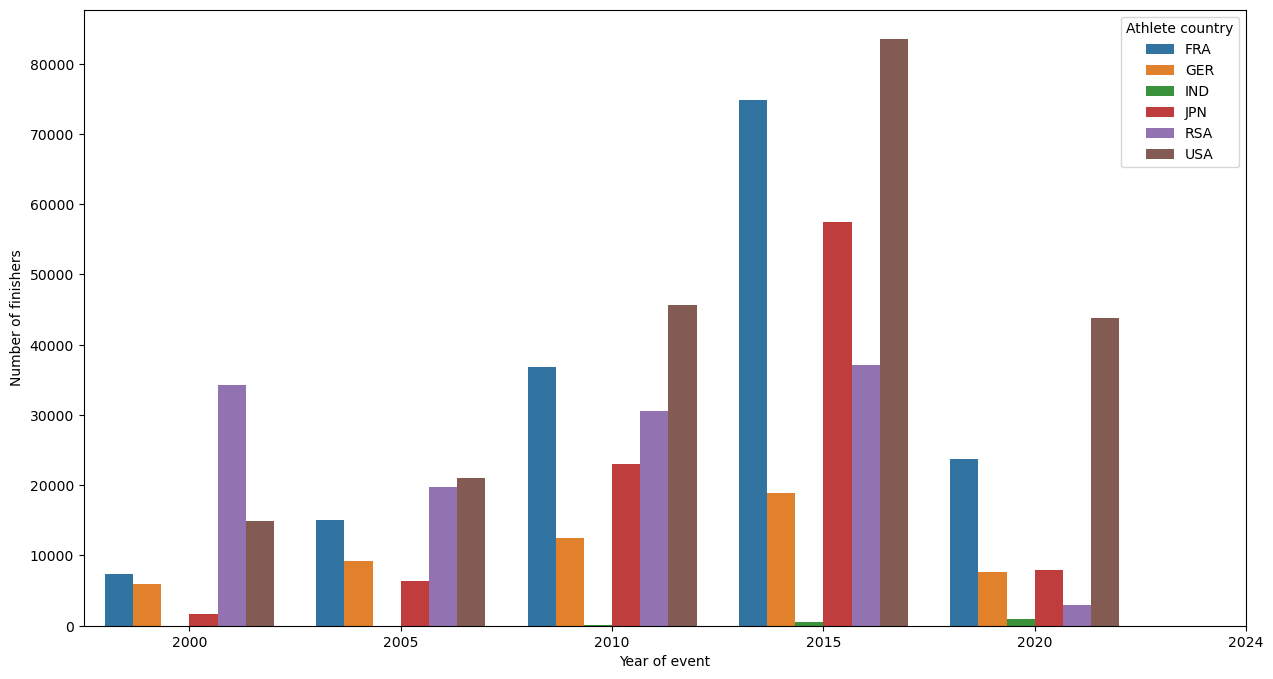

In [206]:
plt.figure(figsize = (15,8))
sns.barplot(data = run5, x = "Year of event", y = "Number of finishers", hue = "Athlete country")
years = [2000, 2005, 2010, 2015, 2020, 2024]
plt.xticks(range(len(years)), years)
plt.show()

# Gender Participation over the years

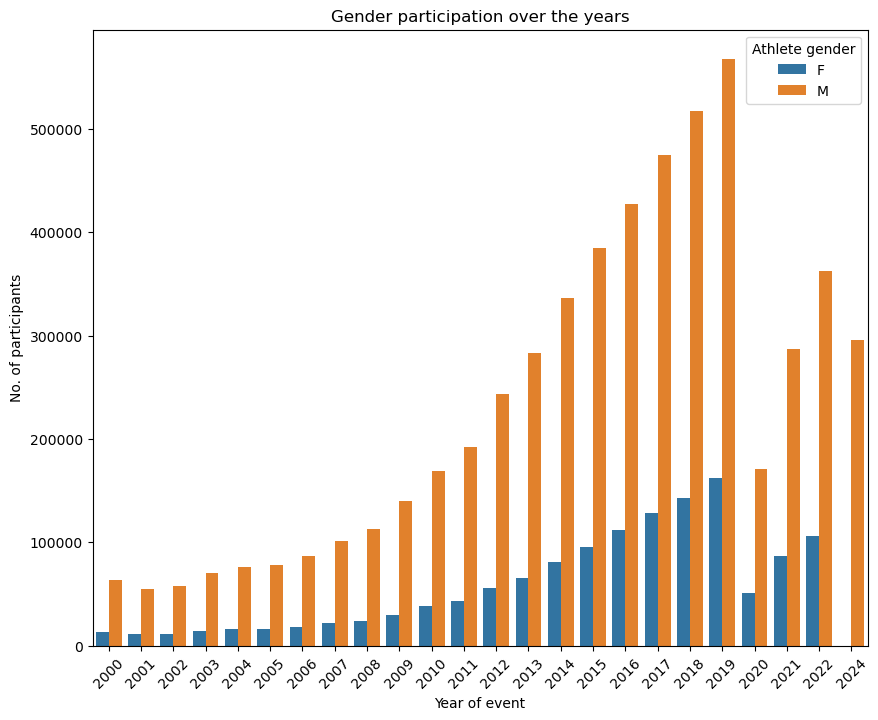

In [207]:
full_df = full_df[full_df["Athlete gender"].isin(["M", "F"])]
gender_years = full_df.groupby(["Athlete gender" , "Year of event"]).size().reset_index(name = "No. of participants")
gender_years_fil = gender_years[gender_years["Year of event"] > 1999]
gender_years_fil
plt.figure(figsize = (10,8))
sns.barplot(gender_years_fil, x = gender_years_fil["Year of event"], y = gender_years_fil["No. of participants"], hue = "Athlete gender")
plt.title("Gender participation over the years")
plt.xticks(rotation = 45)
plt.show()

## Seasonal Participation

In [208]:
# Winter = 12 - 2
# Spring = 3 - 5
# Summer = 6 - 8 
# Fall = 9 - 11
full_df["Event dates"] = pd.to_datetime(full_df["Event dates"], format = "mixed", errors = "coerce")
full_df["Seasons"] = full_df["Event dates"].dt.month.apply(lambda x: "Winter" if x > 11 and x <=2 else "Spring" if x > 2 and x <=5 else 
  
                                                 "Summer" if x > 5 and x <= 8 else "Fall" if x > 8 and x <=11 else "Winter")
seasonal_full = full_df["Seasons"].value_counts()
seasonal_full

/var/folders/wk/dq2pz2ts0kbfwcvtv17zzmmh0000gn/T/ipykernel_27995/2769863914.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/wk/dq2pz2ts0kbfwcvtv17zzmmh0000gn/T/ipykernel_27995/2769863914.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Seasons
Winter    2474013
Spring    1772406
Fall      1452767
Summer    1407206
Name: count, dtype: int64

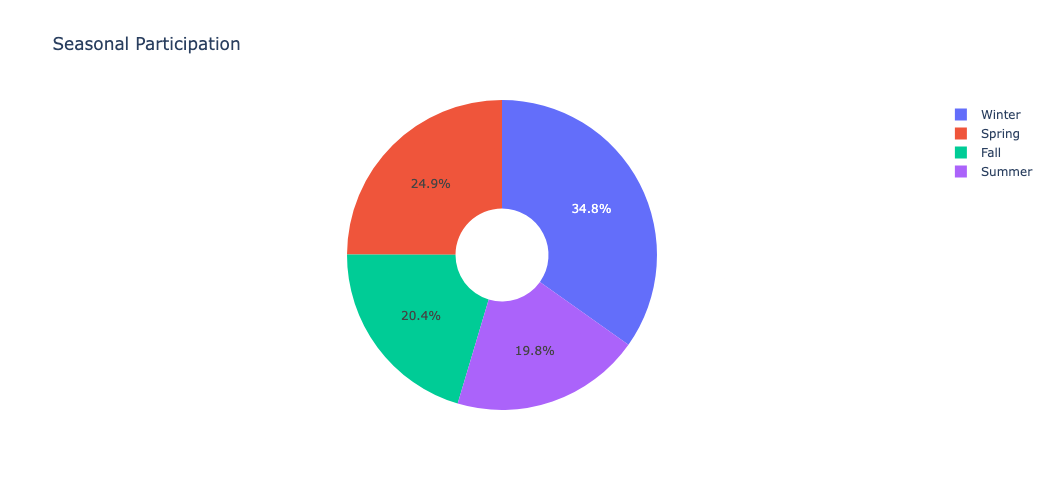

In [209]:
# Since plotly is more interactive using px rather than matplot
px.pie(seasonal_full , names = seasonal_full.index, values = seasonal_full.values, title = "Seasonal Participation", hole = .3, width = 490, height = 490)


# Athelte Performance Metrics

In [210]:
mask = full_df["Event distance/length"].str.match(r"^\d+\.?\d*(km)?$", case = False, na = False)
full_df = full_df[mask]
#  I am ignoring the marathons that are done based on time like 12hours & only keeping distance based ones
full_df["Event distance numeric"] = full_df["Event distance/length"].str.extract(r"(\d+)")
# Extracting just the number part from data like 42.0, 50km etc
full_df["Event distance numeric"] = pd.to_numeric(full_df["Event distance numeric"])
# Converting all of it to numeric format



## Starting Stats tests


### Question 1: Do male and female athletes differ significantly in their average running speed, across all race distances?

In [141]:
male_df = full_df[full_df["Athlete gender"] == "M"]["Athlete average speed"]
female_df = full_df[full_df["Athlete gender"] == "F"]["Athlete average speed"]
#sns.histplot(male_df.dropna(), bins= 300 , kde = False, color = "blue") 
#plt.show()
#male_df.shape(6331324,)



In [211]:
full_df = full_df.rename(columns = {"Athlete average speed" : "Athlete_average_speed", "Athlete gender": "Gender", "Event distance numeric": "Distance"})
model = smf.ols("Athlete_average_speed ~ C(Gender) * Distance", data = full_df).fit()
print(model.summary())

                              OLS Regression Results                             
Dep. Variable:     Athlete_average_speed   R-squared:                       0.063
Model:                               OLS   Adj. R-squared:                  0.063
Method:                    Least Squares   F-statistic:                 1.239e+05
Date:                   Tue, 30 Sep 2025   Prob (F-statistic):               0.00
Time:                           12:31:48   Log-Likelihood:            -1.1943e+07
No. Observations:                5524081   AIC:                         2.389e+07
Df Residuals:                    5524077   BIC:                         2.389e+07
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Text(0.5, 1.0, 'Distributions of Athlete average speed')

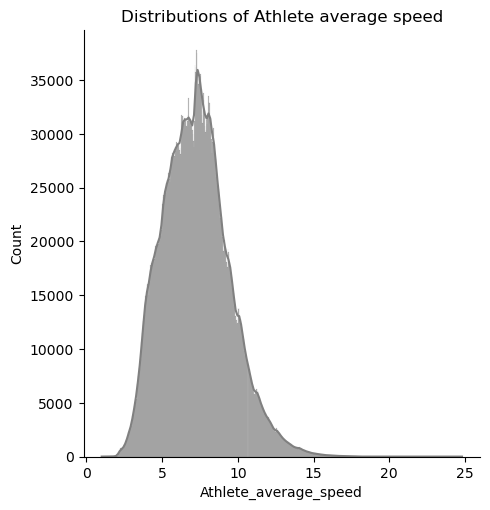

In [213]:
sns.displot(data=full_df,x='Athlete_average_speed',color='grey',kde=True)
plt.title("Distributions of Athlete average speed")